Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 7: K-Means e PCA

Neste exercício, você irá explorar duas técnicas de aprendizado supervisionado: clustering com o algoritmo $K$-means e redução de dimensionalidade com o método de análise de componentes principais (PCA).

Lembre que, além da implementação, você deve incluir também uma **análise** dos resultados. 

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata

def plot_data(X, labels=None, centroids=None, previous_centroids=None):
    if labels is None:
        plt.scatter(X[:,0], X[:,1], s=50)
    else:
        plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.brg, s=50)
    if centroids is not None:
        if previous_centroids is not None:
            plt.scatter(previous_centroids[:,0], previous_centroids[:,1], c=range(centroids.shape[0]), 
                        cmap=plt.cm.brg, marker='X', s=200, linewidths=2, edgecolors='gray')
            for k in range(centroids.shape[0]):
                M = np.r_[previous_centroids[[k]], centroids[[k]]]
                plt.plot(M[:,0],M[:,1],'k-')
        plt.scatter(centroids[:,0], centroids[:,1], c=range(centroids.shape[0]), 
                    cmap=plt.cm.brg, marker='X', s=200, linewidths=2, edgecolors='k')
    plt.show()

def plot_data_pca(X, X_new=None):
    plt.plot(X[:, 0], X[:, 1], 'bo', ms=8, mec='k', mew=0.5)
    if X_new is not None:
        for x, x_new in zip(X, X_new):
            plt.plot([x[0], x_new[0]], [x[1], x_new[1]], 'k--', lw=1)
        plt.plot(X_new[:, 0], X_new[:, 1], 'ro', ms=8, mec='k', mew=0.5)
    plt.gca().set_aspect('equal')
    
def displayData(X, example_width=None, figsize=(6, 6)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

# Clustering com K-Means

## Conjunto de dados #1

O primeiro conjunto de dados é mostrado abaixo.

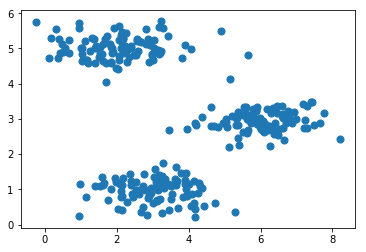

In [2]:
data = loadmat('data/clusters.mat')
X = data['X']
plot_data(X)

Rode o algoritmo K-Means (via biblioteca sklearn) com $K=3$ clusters partindo dos centróides iniciais:

```python
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
```

Quantas iterações foram necessárias para convergência?

Em seguida, mostre as atribuições de clusters (dados rotulados) e os centróides obtidos **a cada meia iteração** do algoritmo. Lembre que uma iteração envolve:
- Dados os centróides, determinar os clusters;
- Dados os clusters, determinar os centróides.

Por exemplo (atualização dos centróides):

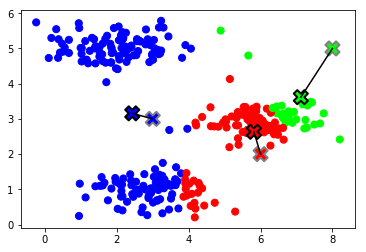

### Dicas
- Utilize a função `plot_data(X, labels, centroids, previous_centroids)`.
- Utilize a opção `max_iter=1` para obter os resultados a cada iteração e `init` para continuar de onde parou.

Em seguida, rode mais uma vez o algoritmo, mas agora com todas as configurações padrão (o que, em particular, envolve múltiplas reinicializações aleatórias com métodos sofisticados de inicialização), e verifique se o algoritmo convergiu para uma solução semelhante.

## Conjunto de dados #2

O próximo conjunto de dados é formado pelas cores dos pixels (no espaço RGB) da imagem abaixo:

(128, 128, 3)
(16384, 3)


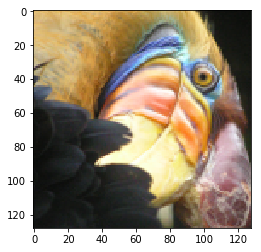

In [27]:
image = plt.imread('data/bird_small.png')
print(image.shape)
plt.imshow(image)
X = image.reshape(-1, 3)
print(X.shape)

O objetivo é:
- Rodar o K-Means para agrupar as cores dos pixels da imagem em $K$ clusters.
- Substituir a cor de cada pixel da imagem pelo centróide do cluster correspondente.
- Mostrar as duas imagens lado a lado.

Utilize vários valores de $K$ e observe as diferenças.

Por exemplo:

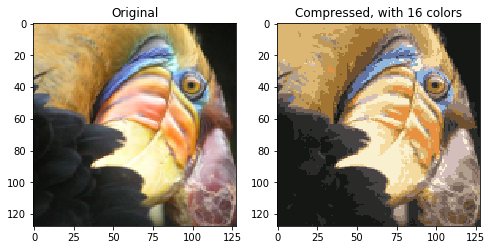

In [96]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(image_rec)
plt.title('Compressed, with %d colors' % K);

(OPCIONAL) Experimente também com outras imagens à sua escolha.

# Análise de Componentes Principais

## Conjunto de dados #3

Para ganhar experiência com PCA vamos começar analisando um conjunto de dados bidimensional simples.

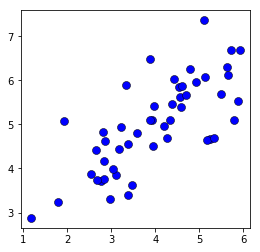

In [176]:
data = loadmat('data/pca1.mat')
X = data['X']
plot_data_pca(X)

Rode o algoritmo PCA (via sklearn) com $k=n=2$ e obtenha os autovetores $\bu_1,\ldots,\bu_n$ e respectivos autovalores $\lambda_1,\ldots,\lambda_n$. Lembre que **antes** de rodar o PCA é fundamental **normalizar os dados** para que cada atributo tenha média nula e variância unitária. As médias e desvios padrão de cada atributo devem ser armazenados para permitir a posterior reconstrução dos dados.

Em seguida, trace setas partindo do ponto de média e indo na direção/sentido dos autovetores, com comprimento igual à raiz quadrada dos respectivos autovalores, i.e., igual ao desvio padrão da componente na nova base (lembre que $\lambda_j = \sigma_{z_j}^2$). Por exemplo:

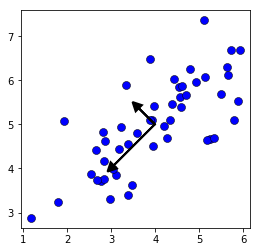

In [177]:
# Normalize

# Run PCA

#  Visualizization
plot_data_pca(X)
for i in range(2):
    plt.arrow(?, ?, ?, ?, 
              head_width=0.2, head_length=0.2, fc='k', lw=2, zorder=1000)

### Dicas
- As funções `np.mean(axis=0)` e `np.std(axis=0)` podem ser úteis. Alternativamente, você pode tentar usar a função `StandardScaler` da sklearn.
- Para traçar as setas, utilize a função `plt.arrow(?, ?, ?, ?, head_width=0.2, head_length=0.2, fc='k', lw=2, zorder=1000)`.
- A notação do sklearn para a matriz de autovetores é a transposta da utilizada nos slides da aula. 

Em seguida, projete os dados em $k=1$ dimensão, obtendo as coordenadas neste novo espaço (é mais fácil rodar o PCA novamente) e reconstrua os dados no espaço original ($n=2$) a partir desta projeção, i.e., aproxime os dados usando apenas a primeira componente principal. 

Finalmente, trace um gráfico ligando cada ponto original à sua projeção. Para isso, use a função `plot_data_pca(X, X_new)`. Por exemplo:

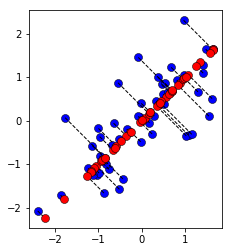

## Conjunto de dados #4

O próximo conjunto de dados consiste de imagens de faces com dimensões 32 x 32 em escala de cinza. O conjunto já está "desdobrado" em vetores de comprimento $n=1024$. Um exemplo das primeiras 100 imagens é mostrado a seguir.

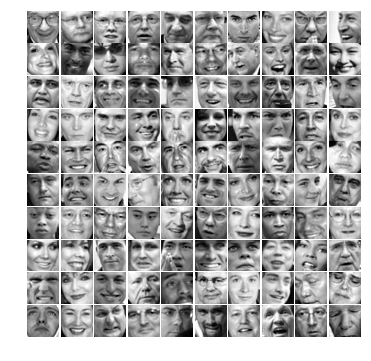

In [197]:
data = loadmat('data/faces.mat')
X = data['X']
displayData(X[:100, :])

Rode o algoritmo PCA com $k=100$ componentes, lembrando sempre de normalizar antes da decomposição.

Visualize como uma imagem a média e os 35 primeiros componentes principais (em uma grade 6x6). Para isso, utilize a função `displayData`, que já efetua automaticamente a conversão para imagens e organiza em uma grade.

In [ ]:
# Normalize

# Run PCA

#  Visualizization
displayData(?, figsize=(8, 8))

Semelhantemente ao exercício anterior, projete as imagens no espaço de autovetores $k$-dimensional e em seguida as reconstrua no espaço $n$-dimensional original (usando apenas as $k=100$ primeiras componentes principais). Lembre que esta reconstrução corresponde às imagens normalizadas, então para obter a reconstrução correta será necessário "desnormalizar", reincorporando a média e desvio padrão de cada atributo.

Finalmente, mostre a versão original e reconstruída das primeiras 100 imagens.

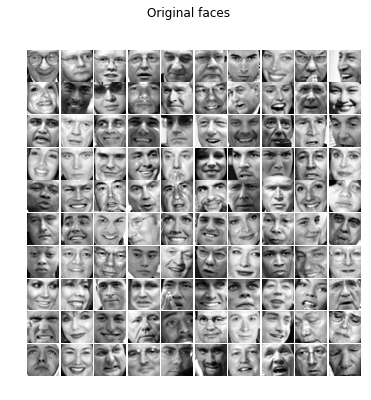

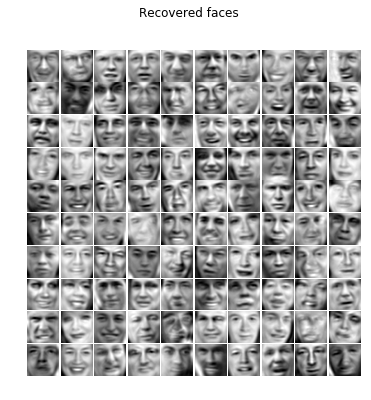

# Conjunto de dados #5: K-Means + PCA

1. Aplique o K-Means no conjunto de dígitos [MNIST](http://scikit-learn.org/stable/datasets/index.html) para tentar encontrar grupos de dígitos similares. Como os rótulos são conhecidos, é possível medir a acurácia da classificação (a menos de uma permutação, pois o algoritmo de clustering não tem como adivinhar exatamente quais são os rótulos). Para fazer uma avaliação justa, você pode dar a um cluster o rótulo correspondente ao dígito que aparece com maior frequência no cluster.
1. Repita o item anterior tendo pré-processado as imagens com PCA, com objetivo de acelerar o K-Means sem alterar significativamente os resultados. Nesse caso, o K-Means será aplicado no espaço transformado, com dimensionalidade reduzida.